# Preliminaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import sys
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sys.path.append("/Users/paolo/Documents/methods/CMI_FS")
from feature_selection import forwardFeatureSelection

sys.path.append("/Users/paolo/Documents/methods/LinCFA")
from LinCFA import LinCFA

sys.path.append("/Users/paolo/Documents/methods/NonLinCFA")
from NonLinCFA import NonLinCFA

sys.path.append("/Users/paolo/Documents/Droughts/Paolo/regression_NonLinCFA")
from aux import standardize,unfold_dataset,compute_r2,prepare_target,prepare_features,aggregate_unfolded_data,FS_with_linearWrapper,compare_methods


In [2]:
def plot_cells(output,selected_colnames, xmin=9, xmax=11, ymin=44, ymax=45.5):
    x = []
    y = []
    colors = cm.rainbow(np.linspace(0,1,len(output)))
    np.random.shuffle(colors)
    fig, ax = plt.subplots(2)
    ax[0].set_xlim(xmin,xmax)
    ax[1].set_xlim(xmin,xmax)
    ax[0].set_ylim(ymin,ymax)
    ax[1].set_ylim(ymin,ymax)
    for i in range(len(output)): 
        #print(len(output[i]))
        x = []
        y = []
        
        for datum in output[i]:
            x.append(float(datum.split('_')[1]))
            y.append(float(datum.split('_')[2]))
        ax[0].scatter(x,y,color=colors[i])
    
    x = []
    y = []
    col = cm.rainbow(np.linspace(0,1,len(selected_colnames)))
    for i in range(len(selected_colnames)): 
        idx = int(selected_colnames[i].split('_')[-1])
        for datum in output[idx]:
            x.append(float(datum.split('_')[1]))
            y.append(float(datum.split('_')[2]))
        ax[1].scatter(x,y,color=col[i])
    

In [4]:
### Nota: devo standardizzare tutto prima di chiamare LinCFA ma non serve validare
# infatti il metodo usa i dati per stimare i pesi della regressione lineare
# anche per CMI_FS non serve validare, usa i dati per quantificare l'informazione condivisa col target

# Target 

target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))


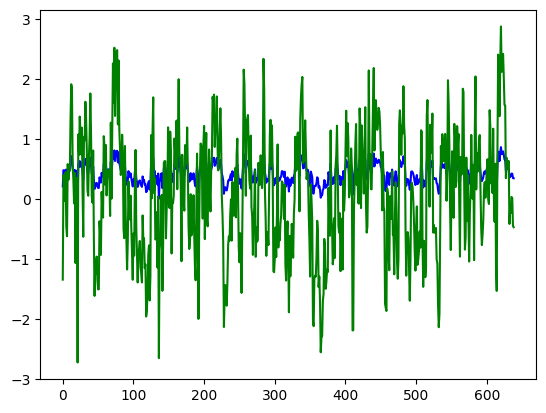

In [3]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')
plt.plot(target_df_trainVal.loc[:,'mean'], color='blue')
plt.plot(target_df_trainVal.loc[:,'mean_std'], color='green')

# Features

In [4]:
path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/Emiliani2_aggreg.csv'

df_test_unfolded_std = pd.DataFrame()
df_trainVal_unfolded_std = pd.DataFrame()

for col in ['cyclostationary_mean_tg','cyclostationary_mean_rr']:
    df_train_unfolded_std_loc,df_val_unfolded_std_loc,df_test_unfolded_std_loc,df_trainVal_unfolded_std_loc = prepare_features(path,col,multiple=False,max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')
    df_trainVal_unfolded_std_loc = df_trainVal_unfolded_std_loc.add_prefix(col)
    df_trainVal_unfolded_std = pd.concat([df_trainVal_unfolded_std, df_trainVal_unfolded_std_loc], axis=1)
    df_test_unfolded_std_loc = df_test_unfolded_std_loc.add_prefix(col)
    df_test_unfolded_std = pd.concat([df_test_unfolded_std, df_test_unfolded_std_loc], axis=1)
    

# 1) Only contemporary week: temperature, precipitation, both

## temperature

### wrapper and CMI

Number of features: 130

Number of aggregated features: 2



selected columns: ['cyclostationary_mean_tg_1', 'cyclostationary_mean_tg_0'], 

validation score: 0.17699994426977628, 

number of selected features: 2
Full aggregate regression train score: 0.16162390081033529, test score: 0.12353194755106689
Aggregate regression train score with FS: 0.16162390081033529, test score: 0.12353194755106711
Full aggregate regression train score: 0.16162390081033529, test score: 0.12353194755106689
Aggregate regression train score with FS: 0.16162390081033529, test score: 0.12353194755106711
----- MI Scores -----
[(1, 0.1340833119244606), (0, 0.12417369947398459)]
Best MI score: 0.1340833119244606
Adding first best original feature: 1
Highest CMI score: -0.004673270522220496

[1]

Full aggregate regression train score: 0.16162390081033529, test score: 0.12353194755106689
Aggregate regression train score with FS: 0.14947195710400663, test score: 0.12073674266477563
Full aggregate regression train s

Number of features: 130

Number of aggregated features: 8



selected columns: ['cyclostationary_mean_tg_5', 'cyclostationary_mean_tg_4', 'cyclostationary_mean_tg_1', 'cyclostationary_mean_tg_0', 'cyclostationary_mean_tg_2'], 

validation score: 0.2190041646846823, 

number of selected features: 5
Full aggregate regression train score: 0.19970482924362076, test score: 0.12993484713474313
Aggregate regression train score with FS: 0.18320057780728505, test score: 0.14140649208619394
Full aggregate regression train score: 0.19970482924362076, test score: 0.12993484713474313
Aggregate regression train score with FS: 0.18320057780728505, test score: 0.14140649208619394
----- MI Scores -----
[(5, 0.1349170730411436), (3, 0.13065462984779644), (0, 0.1203036641608127), (1, 0.11185209883590831), (4, 0.09837955367460148), (7, 0.09674503527089101), (6, 0.08633953056624281), (2, 0.07671004309464893)]
Best MI score: 0.1349170730411436
Adding first best original feature: 5
CMI: 0.007128027531736858


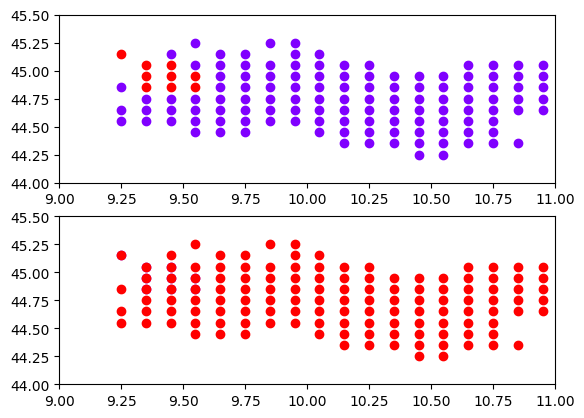

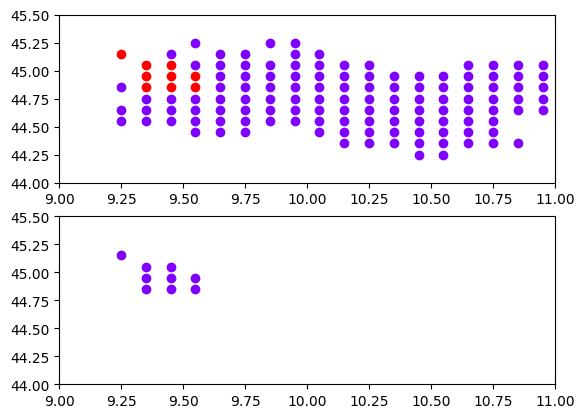

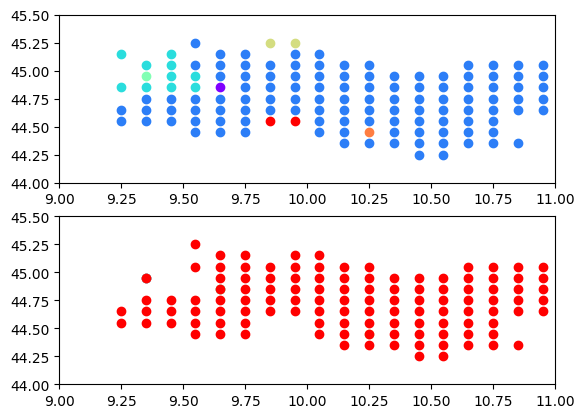

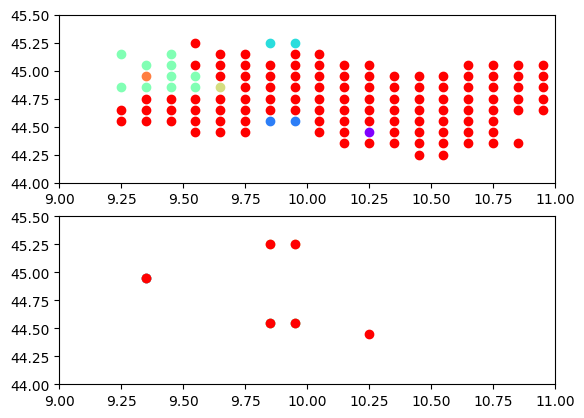

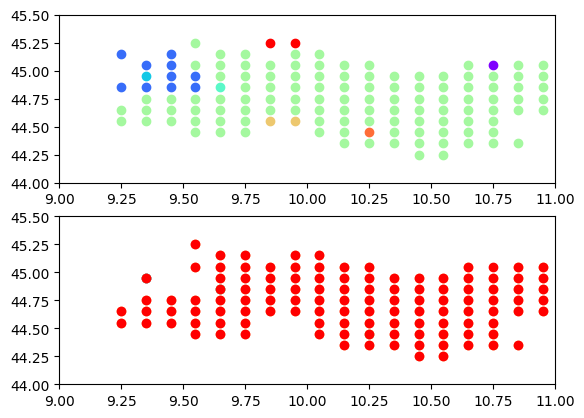

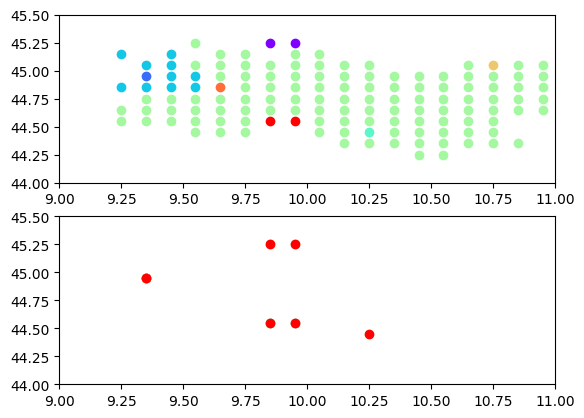

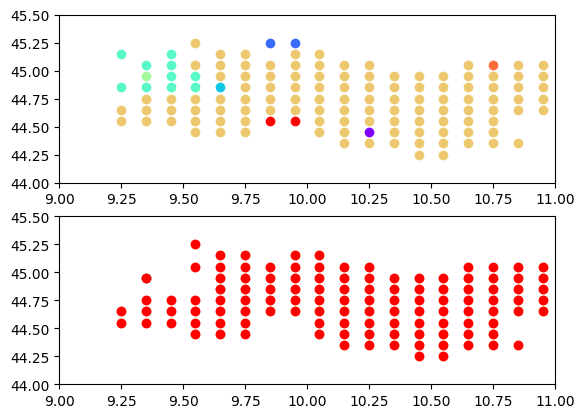

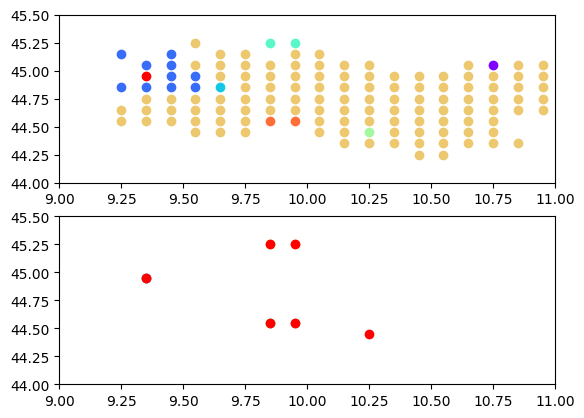

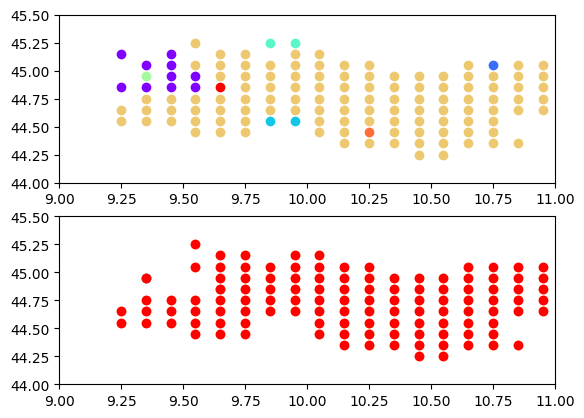

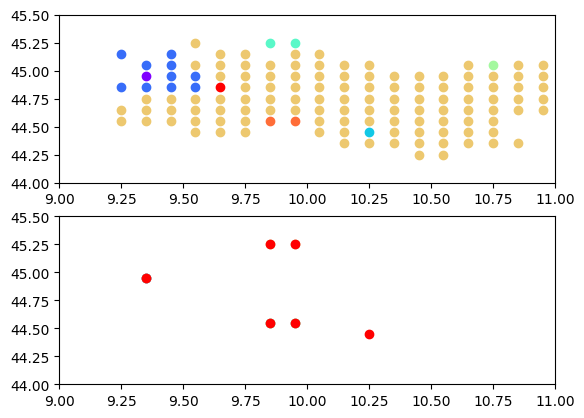

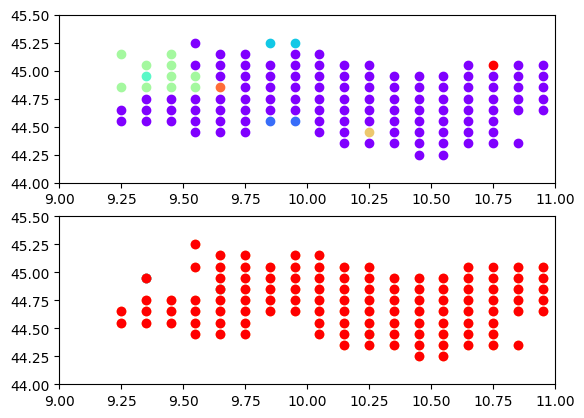

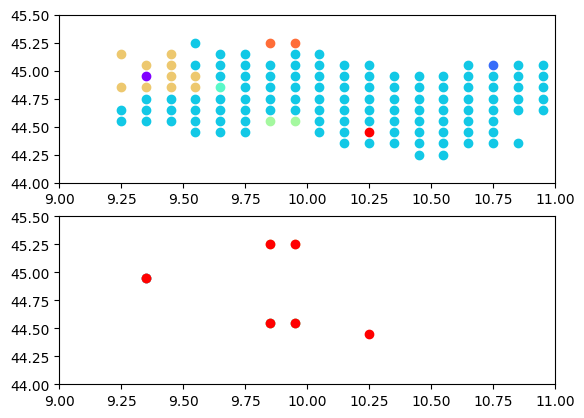

In [5]:
### what happens without considering the last years?

for eps in [0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001]:
    output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg'],target_df_trainVal, eps=eps ,max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

    selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, min(50,len(output)-1), 228)

    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)
    
    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])
    
    plot_cells(output,selected_colnames, xmin=9, xmax=11, ymin=44, ymax=45.5)
    
    ###########
    
    res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
    }
    
    res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
    selectedFeatures='selectedFeatures'
    print(f'\n{res[selectedFeatures]}\n')
    selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)
    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])

    plot_cells(output,selected_colnames, xmin=9, xmax=11, ymin=44, ymax=45.5)
    

## precipitation

### wrapper and CMI FS

Number of features: 130

Number of aggregated features: 4



selected columns: ['cyclostationary_mean_rr_1', 'cyclostationary_mean_rr_0'], 

validation score: -0.01259332027471749, 

number of selected features: 2
Full aggregate regression train score: 0.08094813506531717, test score: 0.08098455338854815
Aggregate regression train score with FS: 0.0790411123339444, test score: 0.07932111511054085
Full aggregate regression train score: 0.08094813506531717, test score: 0.08098455338854815
Aggregate regression train score with FS: 0.0790411123339444, test score: 0.07932111511054085
----- MI Scores -----
[(1, 0.08922158188870863), (3, 0.08567593319484494), (2, 0.07722675194947042), (0, 0.05020032069784832)]
Best MI score: 0.08922158188870863
Adding first best original feature: 1
CMI: 0.0006694038942101216
Highest CMI score: 0.0006694038942101216
Adding original feature: 3
CMI: 0.009590798502214531
Highest CMI score: 0.009590798502214531
Adding original feature: 2
Highest CMI score: -0.0082

----- MI Scores -----
[(3, 0.08939889585589772), (0, 0.07919816591699666), (4, 0.07629816179755175), (2, 0.0749465191789086), (9, 0.0681175128446899), (6, 0.06568654390181151), (7, 0.06405548699189753), (1, 0.05093984246265172), (8, 0.04064276056520507), (5, 0.03768890862488619)]
Best MI score: 0.08939889585589772
Adding first best original feature: 3
CMI: 0.009626078388478843
CMI: 0.0013426068507333827
CMI: 0.01057786547986131
CMI: 0.006922455790432089
Highest CMI score: 0.01057786547986131
Adding original feature: 7
Highest CMI score: -0.0002615736287408521

[3, 7]

Full aggregate regression train score: 0.09199438491783463, test score: 0.05650999771148091
Aggregate regression train score with FS: 0.07484760662970491, test score: 0.07332471208684466
Full aggregate regression train score: 0.09199438491783463, test score: 0.05650999771148091
Aggregate regression train score with FS: 0.07484760662970491, test score: 0.07332471208684466


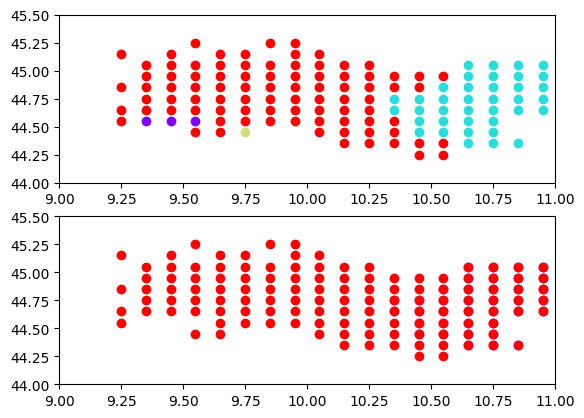

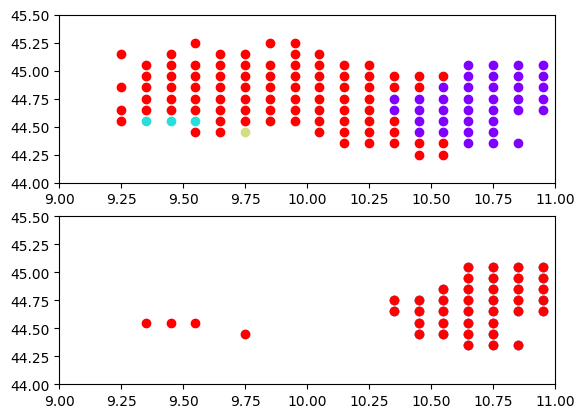

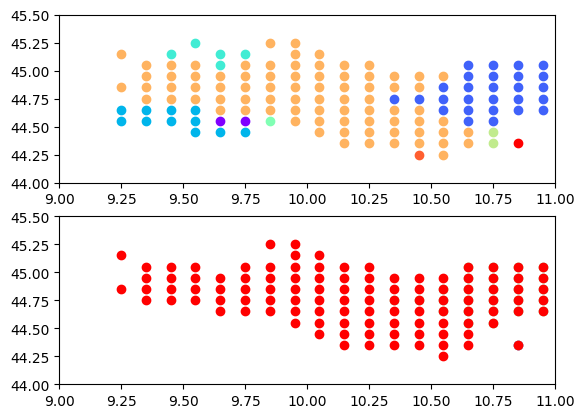

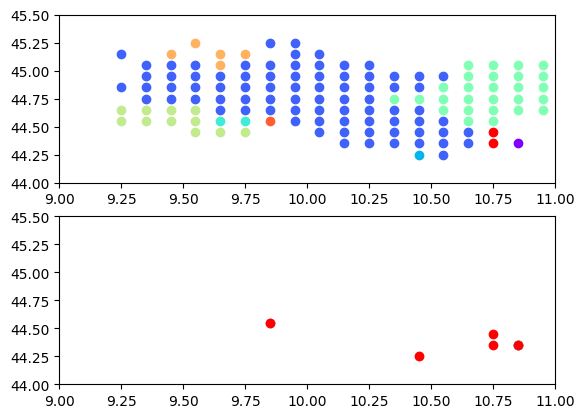

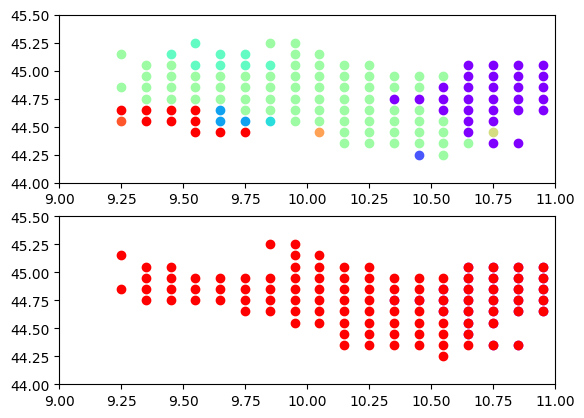

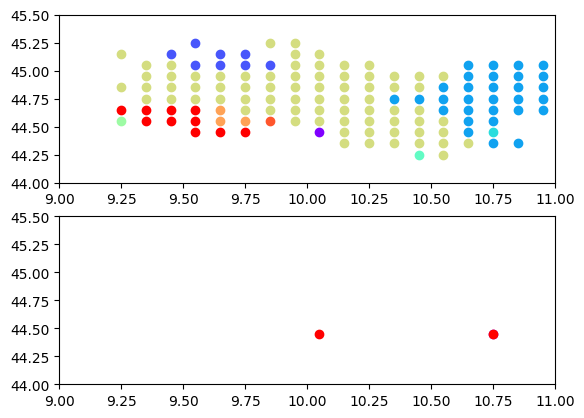

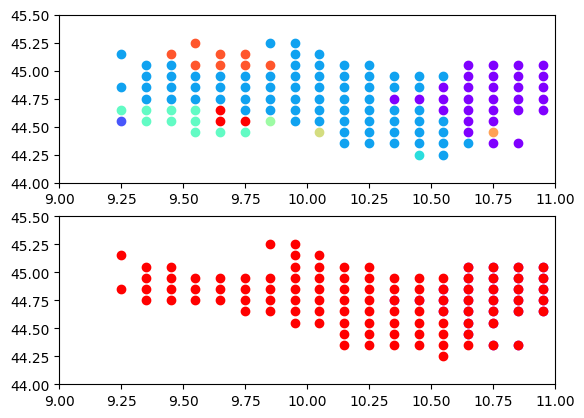

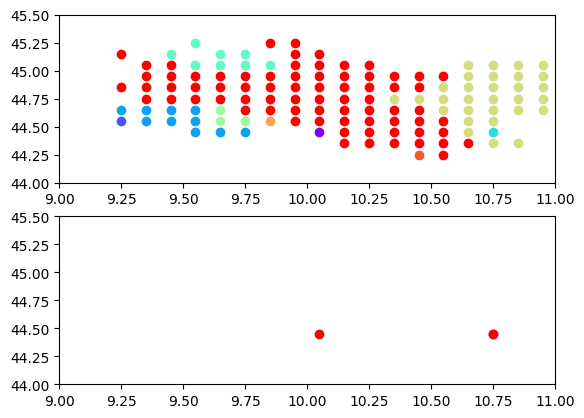

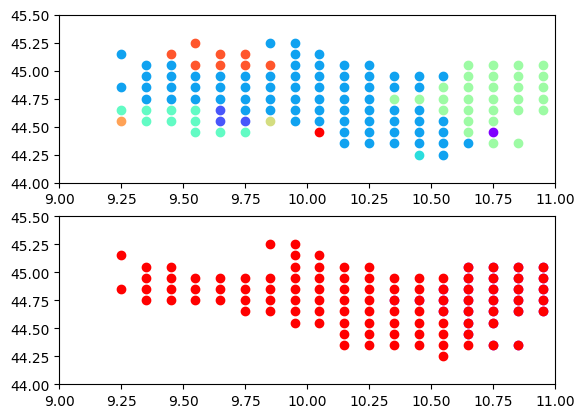

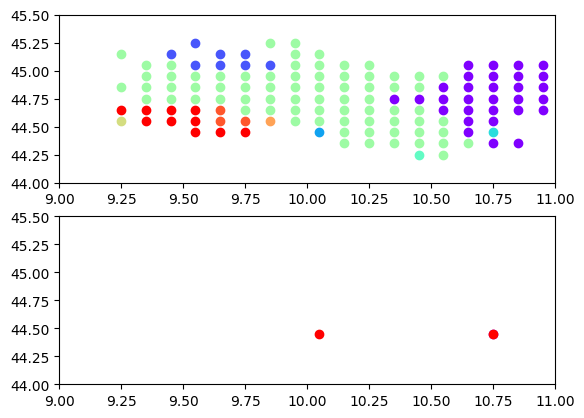

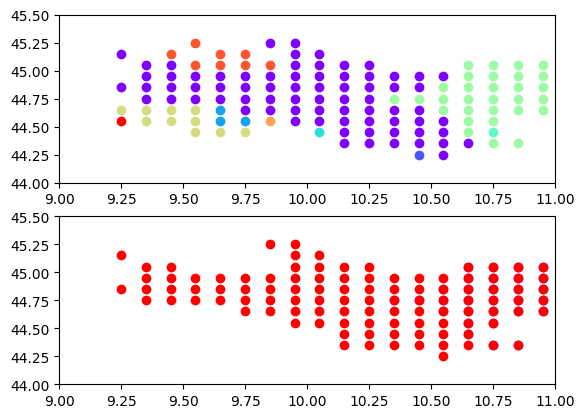

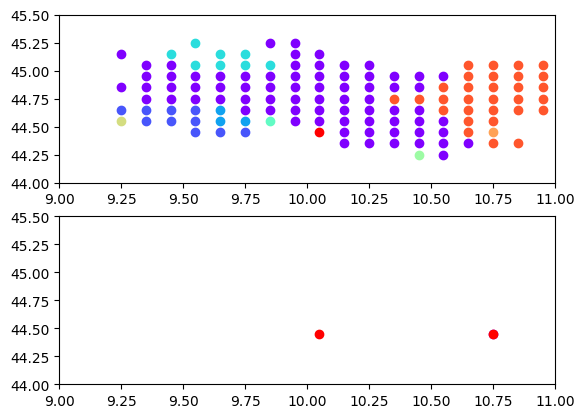

In [6]:
### what happens without considering the last years?

for eps in [0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001]:
    output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_rr'],target_df_trainVal, eps=eps ,max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

    selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, min(50,len(output)-1), 228)

    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)
    
    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])
    
    plot_cells(output,selected_colnames, xmin=9, xmax=11, ymin=44, ymax=45.5)
    
    ###########
    
    res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
    }
    
    res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
    selectedFeatures='selectedFeatures'
    print(f'\n{res[selectedFeatures]}\n')
    selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)
    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])

    plot_cells(output,selected_colnames, xmin=9, xmax=11, ymin=44, ymax=45.5)
    

## temperature and precipitation

### wrapper and CMI FS

Number of features: 130

Number of aggregated features: 2

Number of features: 130

Number of aggregated features: 4



selected columns: ['cyclostationary_mean_tg_1', 'cyclostationary_mean_tg_0'], 

validation score: 0.17699994426977628, 

number of selected features: 2
Full aggregate regression train score: 0.18362040805661317, test score: 0.1624719482228899
Aggregate regression train score with FS: 0.16162390081033529, test score: 0.12353194755106711
Full aggregate regression train score: 0.18362040805661317, test score: 0.1624719482228899
Aggregate regression train score with FS: 0.16162390081033529, test score: 0.12353194755106711
----- MI Scores -----
[(1, 0.1340833119244606), (0, 0.12417369947398459), (3, 0.08922158188870863), (5, 0.08567593319484494), (4, 0.07722675194947042), (2, 0.05020032069784832)]
Best MI score: 0.1340833119244606
Adding first best original feature: 1
CMI: 0.0030608853583480033
CMI: 0.019989896092481335
Highest CMI score: 0.019989896092481335
Adding origin

Number of features: 130

Number of aggregated features: 8

Number of features: 130

Number of aggregated features: 10



selected columns: ['cyclostationary_mean_tg_5', 'cyclostationary_mean_tg_4', 'cyclostationary_mean_tg_1', 'cyclostationary_mean_tg_0', 'cyclostationary_mean_tg_2', 'cyclostationary_mean_rr_7', 'cyclostationary_mean_rr_9'], 

validation score: 0.22292459162096012, 

number of selected features: 7
Full aggregate regression train score: 0.22454843118838286, test score: 0.14436049966783804
Aggregate regression train score with FS: 0.18540425411672257, test score: 0.14552826446153488
Full aggregate regression train score: 0.22454843118838286, test score: 0.14436049966783804
Aggregate regression train score with FS: 0.18320057780728505, test score: 0.14140649208619394
----- MI Scores -----
[(5, 0.1349170730411436), (3, 0.13065462984779644), (0, 0.1203036641608127), (1, 0.11185209883590831), (4, 0.09837955367460148), (7, 0.09674503527089101), (11, 0.08939889585589772), (6, 

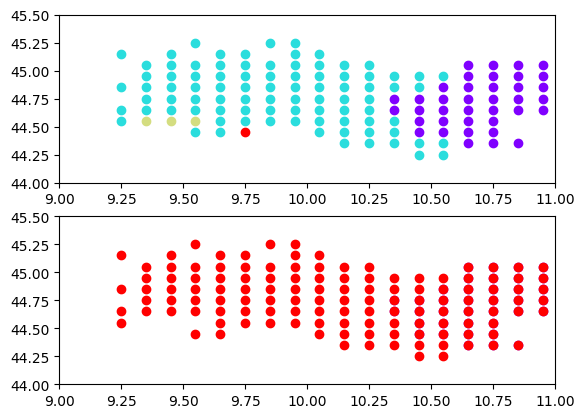

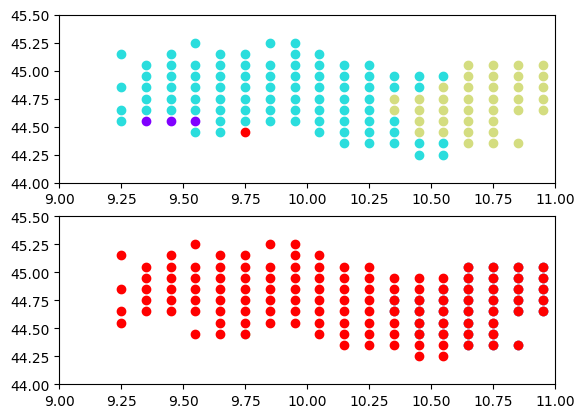

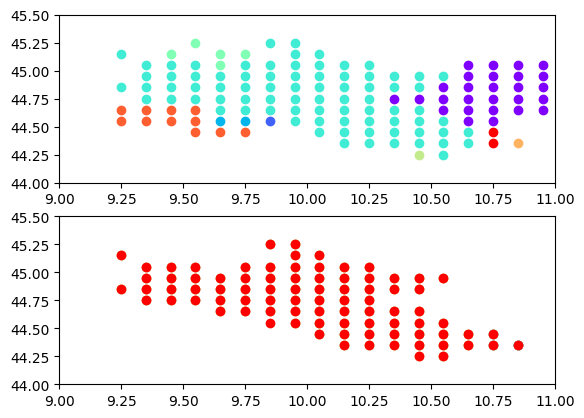

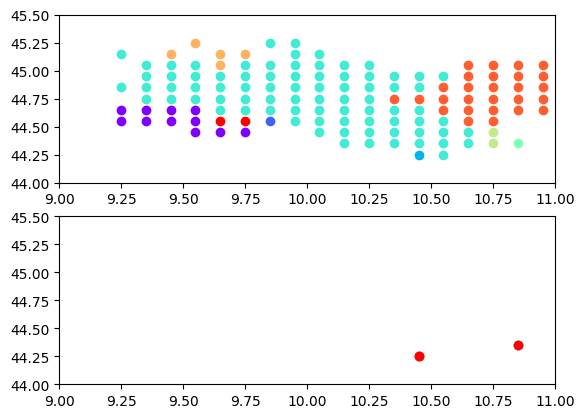

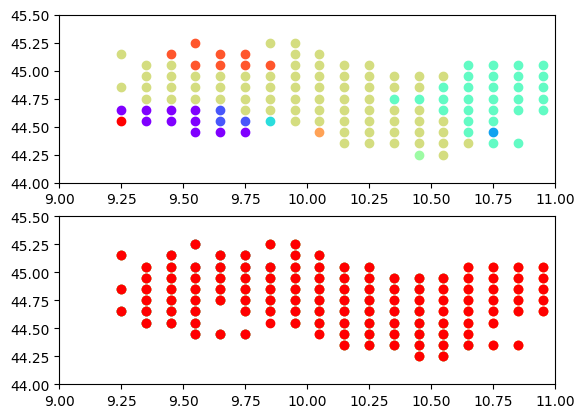

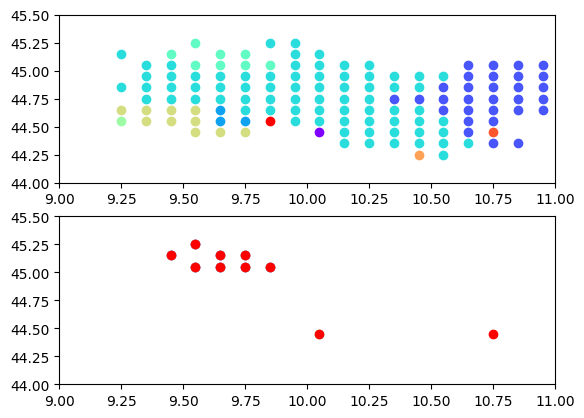

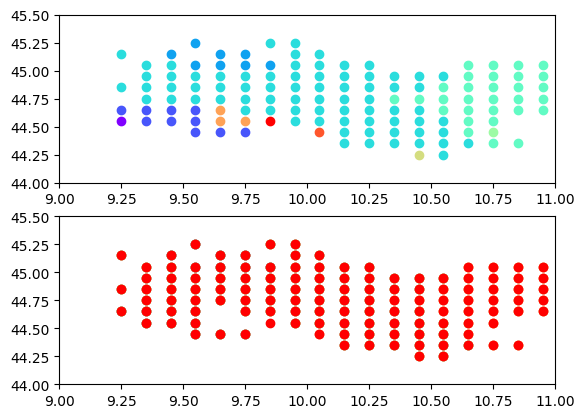

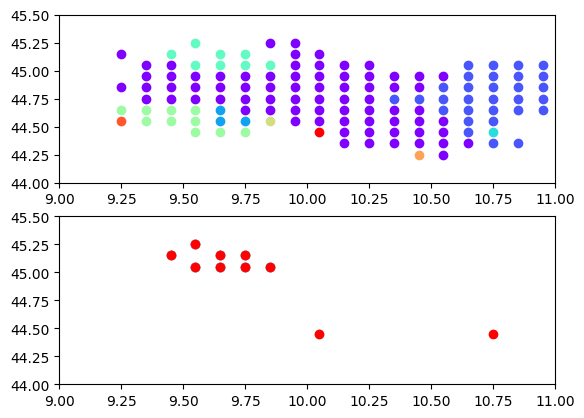

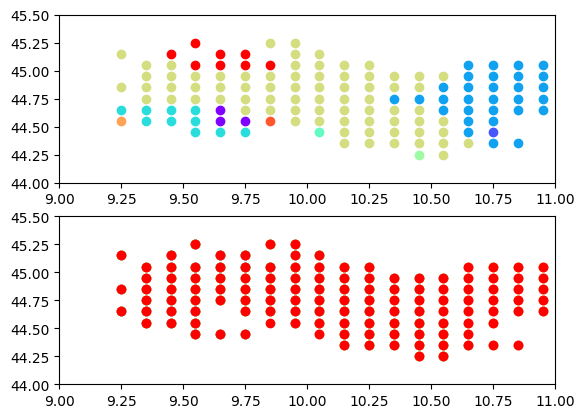

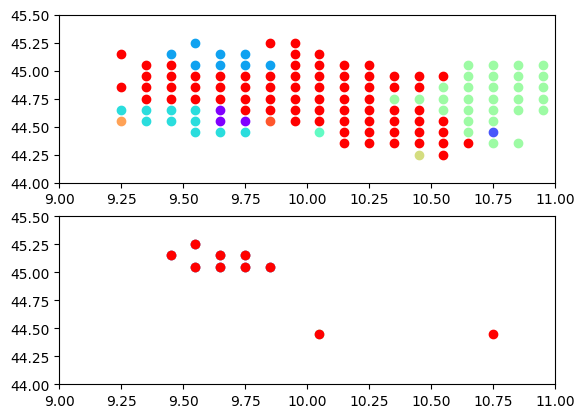

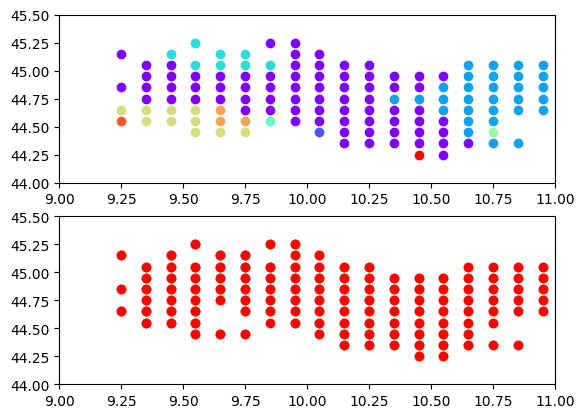

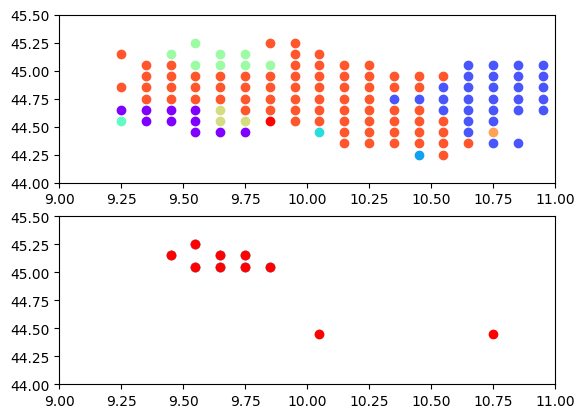

In [7]:
### what happens without considering the last years?

for eps in [0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001]:
    output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg','cyclostationary_mean_rr'],target_df_trainVal, eps=eps ,max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

    selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, min(50,len(output)-1), 228)

    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)
    
    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])
    
    plot_cells(output,selected_colnames, xmin=9, xmax=11, ymin=44, ymax=45.5)
    
    ###########
    
    res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
    }
    
    res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
    selectedFeatures='selectedFeatures'
    print(f'\n{res[selectedFeatures]}\n')
    selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)
    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])

    plot_cells(output,selected_colnames, xmin=9, xmax=11, ymin=44, ymax=45.5)
    